In [48]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [42]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Читання, запитання-відповідь
import pandas as pd

table = pd.read_csv('/Users/vika/Desktop/bestsellers with categories.csv')

data = data.drop_duplicates(subset='Name')

print("Перші 5 рядків:")
print(data.head())

print("\nРозмір датасета без дублікатів:", data.shape)

# Підрахунок кількості книг
кількість_книг = data['Name'].count()
print("\nКількість книг у датасеті:", кількість_книг)

Перші 5 рядків:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

Розмір датасета без дублікатів: (351, 7)

Кількість книг у датасеті: 351


In [14]:
#Спрощення таблиці
data.rename(columns={'Name': 'name', 'Author': 'author', 'User Rating': 'user_rating', 'Reviews': 'reviews', 'Price': 'price', 'Year': 'year', 'Genre': 'genre'}, inplace=True)

print(data)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

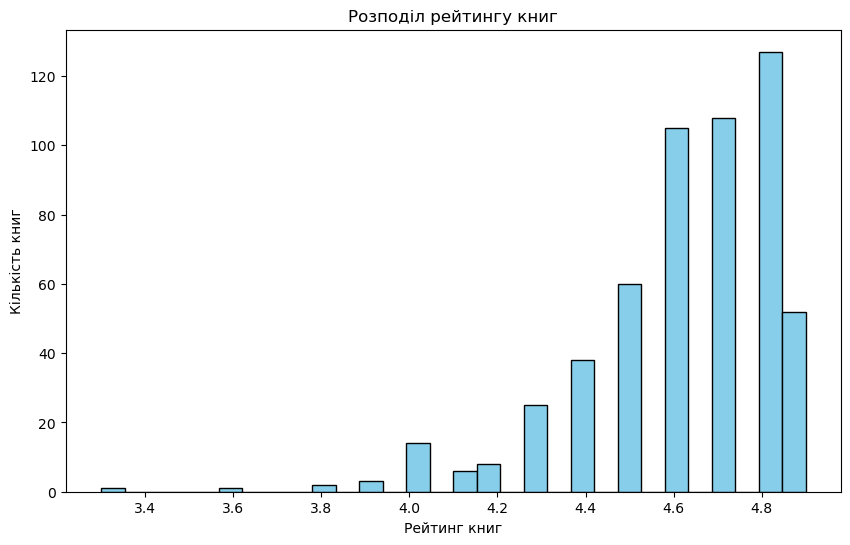

In [13]:
#ВІЗУАЛІЗАЦІЯ ГР.1
#Графік рейтингу книг
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['user_rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Розподіл рейтингу книг')
plt.xlabel('Рейтинг книг')
plt.ylabel('Кількість книг')
plt.show()

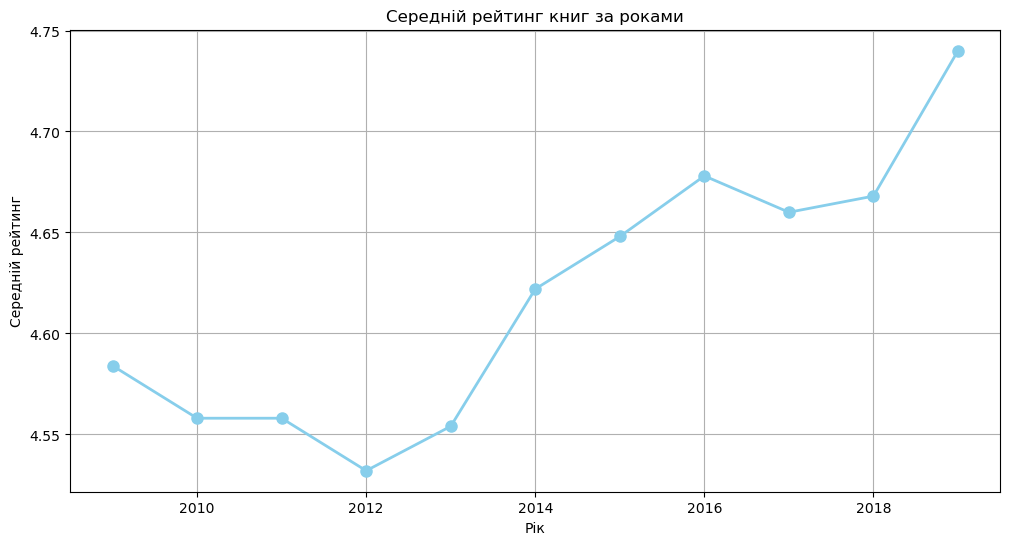

In [15]:
#ВІЗУАЛІЗАЦІЯ ГР.2
#Графік середнього рейтингу книг за роками
average_rating_by_year = data.groupby('year')['user_rating'].mean()

plt.figure(figsize=(12, 6))
average_rating_by_year.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.title('Середній рейтинг книг за роками')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()

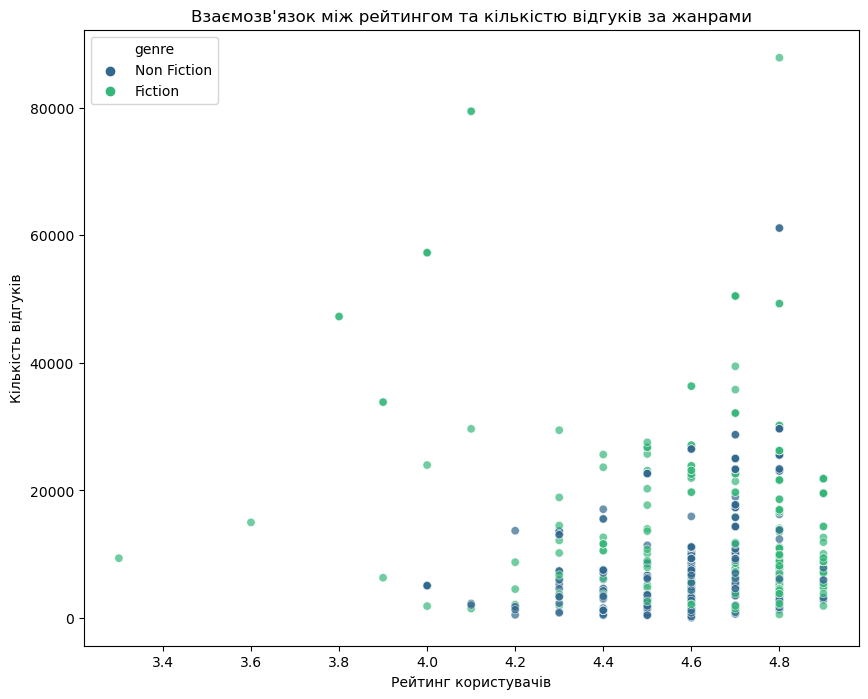

In [18]:
#ВІЗУАЛІЗАЦІЯ ГР.3
#Графік взяємозв`язку рейтингу і відгуків
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='user_rating', y='reviews', hue='genre', data = data_table, palette='viridis', alpha=0.7)
plt.title('Взаємозв\'язок між рейтингом та кількістю відгуків за жанрами')
plt.xlabel('Рейтинг користувачів')
plt.ylabel('Кількість відгуків')
plt.show()

In [19]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
missing_values = data.isna().sum()

print("Количество пропусков в каждом столбце:")
print(missing_values)

any_missing = missing_values.any()

print("\nЕсть ли в каких-то переменных пропуски? (Так / ні):", "Так" if any_missing else "Ні")

Количество пропусков в каждом столбце:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Есть ли в каких-то переменных пропуски? (Так / ні): Ні


In [20]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = data['genre'].unique()
result_string = ', '.join(unique_genres)

print("Які є унікальні жанри?:", result_string)

Які є унікальні жанри?: Non Fiction, Fiction


Max Price: 105
Min Price: 0
Mean Price: 13.1
Median Price: 11.0


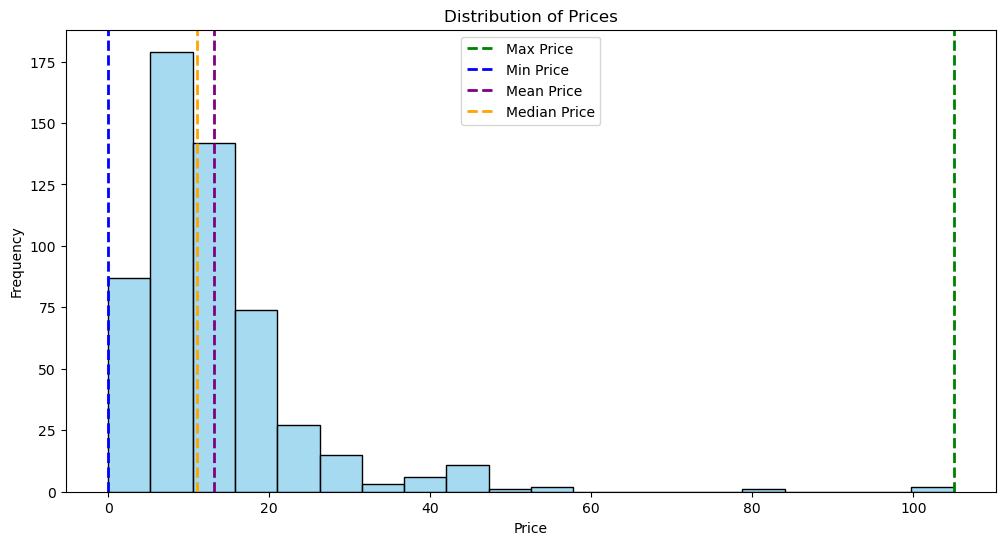

In [24]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
# Розрахунок максимальної, мінімальної, середньої та медіанної цін
max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

# Виведення результатів
print(f'Max Price: {max_price}')
print(f'Min Price: {min_price}')
print(f'Mean Price: {mean_price}')
print(f'Median Price: {median_price}')

# Створення гістограми з використанням seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=20, color='skyblue', kde=False)
plt.axvline(max_price, color='green', linestyle='dashed', linewidth=2, label='Max Price')
plt.axvline(min_price, color='blue', linestyle='dashed', linewidth=2, label='Min Price')
plt.axvline(mean_price, color='purple', linestyle='dashed', linewidth=2, label='Mean Price')
plt.axvline(median_price, color='orange', linestyle='dashed', linewidth=2, label='Median Price')

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
#Максимальна ціна
print("Максимальна ціна?","Відповідь:",max_price)

Максимальна ціна? Відповідь: 105


In [26]:
#Мінімальна ціна
print("Мінімальна ціна?","Відповідь:",min_price)

Мінімальна ціна? Відповідь: 0


In [27]:
#Середня ціна
print("Мінімальна ціна?","Відповідь:",mean_price)

Мінімальна ціна? Відповідь: 13.1


In [28]:
#Медіанна ціна
print("Медіанна ціна?","Відповідь:",median_price)

Медіанна ціна? Відповідь: 11.0


In [ ]:
#ПОШУК ТА СОРТУВАННЯ ДАННИХ

In [30]:
#Який рейтинг у датасеті найвищий?
max_user_rating = data['user_rating'].max()
print("Який рейтинг у датасеті Найвищий рейтинг?","Відповідь:", max_user_rating)

Який рейтинг у датасеті Найвищий рейтинг? Відповідь: 4.9


In [31]:
#Скільки книг мають такий рейтинг?
book_ratings_counts = data['user_rating'].value_counts()
print("Скільки книг мають такий рейтинг?", "Відповідь:", book_ratings_counts)

Скільки книг мають такий рейтинг? Відповідь: user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64


In [32]:
#Яка книга має найбільше відгуків?
most_reviewed_book = data.loc[data_table['reviews'].idxmax()]
print("Яка книга має найбільше відгуків?", "Відповідь:", most_reviewed_book)

Яка книга має найбільше відгуків? Відповідь: name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [33]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
top_books_2015 = data[data['year'] == 2015].nlargest(50, 'user_rating')
most_expensive_book_2015 = top_books_2015.loc[top_books_2015['price'].idxmax()]
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?", "Відповідь:", most_expensive_book_2015)

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


In [34]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році
top_books_2010 = data[(data['year'] == 2010) & (data['genre'] == 'Fiction')].nlargest(50, 'user_rating')
top_books_2010s = len(top_books_2010)
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?", "Відповідь:", top_books_2010s)

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20


In [35]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
top_books_2010_11 = data[(data['year'].isin([2010, 2011])) & (data['user_rating'] == 4.9)]
top_books_2010_11s = len(top_books_2010_11)
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?","Відповідь:", top_books_2010_11s)

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1


In [71]:
#Сортування всіх книг за зростанням ціни, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
selected_books_2015 = top_books_2015[(top_books_2015['year'] == 2015) & (top_books_2015['price'] < 8)]
sorted_books_2015 = selected_books_2015.sort_values(by='price', ascending=True)
print(sorted_books_2015)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
123                               Giraffes Can't Dance       Giles Andreae   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
478                        The Very Hungry Caterpillar          Eric Carle   
224                                   Love You Forever       Robert Munsch   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
55   Creative Haven Owls Coloring Book (Adult Color...     Marjorie Sarnat   
28                        Baby Touch and Feel: Animals                  DK   
201  Killing Reagan: The Violent Assault That Chang...       Bil

In [80]:
#Яка книга остання у відсортованому списку?
last_row = sorted_books_2015.tail(1)
print("Яка книга остання у відсортованому списку?", "Відповідь:", last_row)

Яка книга остання у відсортованому списку? Відповідь:                                       name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [ ]:
#АГРЕГУВАННЯ ДАННИХ ТА З'ЄДНАННЯ ТАБЛИЦЬ

In [36]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції
#groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
result = data.groupby('genre').agg({'price': ['min', 'max']})
print(result)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [37]:
#Максимальна ціна для жанру Fiction
fiction_data = data[data['genre'] == 'Fiction']
max_price_fiction = fiction_data['price'].max()
print("Максимальна ціна для жанру Fiction?", "Відповідь:", max_price_fiction)

Максимальна ціна для жанру Fiction? Відповідь: 82


In [38]:
#Мінімальна ціна для жанру Fiction
fiction_data = data[data['genre'] == 'Fiction']
min_price_fiction = fiction_data['price'].min()
print("Мінімальна ціна для жанру Fiction?", "Відповідь:", min_price_fiction)

Мінімальна ціна для жанру Fiction? Відповідь: 0


In [39]:
#Максимальна ціна для жанру Non Fiction
non_fiction_data = data[data['genre'] == 'Non Fiction']
max_price_non_fiction = non_fiction_data['price'].max()
print("Максимальна ціна для жанру Non Fiction?", "Відповідь:", max_price_non_fiction)

Максимальна ціна для жанру Non Fiction? Відповідь: 105


In [40]:
#Мінімальна ціна для жанру Non Fiction
non_fiction_data = data[data['genre'] == 'Non Fiction']
min_price_non_fiction = non_fiction_data['price'].min()
print("Мінімальна ціна для жанру Non Fiction?", "Відповідь:", min_price_non_fiction)

Мінімальна ціна для жанру Non Fiction? Відповідь: 0


In [43]:
#Кількість книг для кожного з авторів
author_book_count = data.groupby('author').agg({'name': 'count'}).reset_index()
author_book_count.columns = ['author', 'book_count']

print(author_book_count)

                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [100]:
#Розмір таблиці
table_size = author_book_count.shape
print("Якої розмірності вийшла таблиця?(рядки/стовпці)", "Відповідь:", table_size)

Якої розмірності вийшла таблиця?(рядки/стовпці) Відповідь: (248, 2)


In [103]:
#Який автор має найбільше книг?
max_books_author = author_book_count.loc[author_book_count['book_Count'].idxmax(), 'author']
print("Який автор має найбільше книг?", "Відповідь:", max_books_author)

Який автор має найбільше книг? Відповідь: Jeff Kinney


In [105]:
#Скільки книг цього автора?
books_count = author_book_count.loc[author_book_count['author'] == max_books_author, 'book_Count'].values[0]
print("Скільки книг цього автора?","Відповідь:", books_count)

Скільки книг цього автора? Відповідь: 12


In [44]:
# Середній рейтинг для кожного автора
author_avg_rating = data.groupby('author').agg({'user_rating': 'mean'}).reset_index()
author_avg_rating.columns = ['author', 'avg_rating']
print(author_avg_rating)

                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


In [113]:
#У якого автора середній рейтинг мінімальний? 
min_rate_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin(), 'author']
min_rate_value = author_avg_rating['avg_rating'].min()
print(" У якого автора середній рейтинг мінімальний?", "Відповідь:", min_rate_author)

 У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


In [114]:
#Який у цього автора середній рейтинг?
print("Який у цього автора середній рейтинг?","Відповідь:", min_rate_value)

Який у цього автора середній рейтинг? Відповідь: 3.9


In [115]:
#Датафрейм авторів з кількістю книг і середнім рейтингом
merged_table = pd.concat([author_book_count, author_avg_rating], axis=1)
print(merged_table)

                         author  book_Count                      author  \
0              Abraham Verghese           2            Abraham Verghese   
1                Adam Gasiewski           1              Adam Gasiewski   
2                 Adam Mansbach           1               Adam Mansbach   
3                     Adir Levy           1                   Adir Levy   
4    Admiral William H. McRaven           1  Admiral William H. McRaven   
..                          ...         ...                         ...   
243             Walter Isaacson           3             Walter Isaacson   
244               William Davis           2               William Davis   
245            William P. Young           2            William P. Young   
246            Wizards RPG Team           3            Wizards RPG Team   
247                Zhi Gang Sha           2                Zhi Gang Sha   

     avg_rating  
0      4.600000  
1      4.400000  
2      4.800000  
3      4.800000  
4      4.

In [116]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
sorted_mt = merged_table.sort_values(by='avg_rating')
print(sorted_mt)

                 author  book_Count              author  avg_rating
71          Donna Tartt           2         Donna Tartt         3.9
100       Gillian Flynn           3       Gillian Flynn         4.0
171      Muriel Barbery           1      Muriel Barbery         4.0
90               Gallup           9              Gallup         4.0
109   Ian K. Smith M.D.           1   Ian K. Smith M.D.         4.1
..                  ...         ...                 ...         ...
146  Lin-Manuel Miranda           1  Lin-Manuel Miranda         4.9
178      Patrick Thorpe           1      Patrick Thorpe         4.9
173      Nathan W. Pyle           1      Nathan W. Pyle         4.9
26      Bill Martin Jr.           2     Bill Martin Jr.         4.9
123          Jill Twiss           1          Jill Twiss         4.9

[248 rows x 4 columns]


In [120]:
#Який автор перший у списку?
first_author = sorted_mt.iloc[0]

print("Який автор перший у списку?", "Відповідь",  first_author)

Який автор перший у списку? Відповідь author        Donna Tartt
book_Count              2
author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object
